In [ ]:
from IPython.display import clear_output

In [ ]:
!pip install torch -f https://pytorch-geometric.com/whl/torch-1.10.0+cpu.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.10.0+cpu.html
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.10.0+cpu.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.10.0+cpu.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.10.0+cpu.html
!pip install torch-geometric
!pip install torch-geometric-temporal
clear_output()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import networkx as nx

import torch_geometric
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import to_networkx


In [ ]:
import pandas as pd
import numpy as np
import os
import yfinance as yf
apple_data = yf.download('AAPL', start='2019-12-05', end='2023-12-05')
abbv_data = yf.download('ABBV', start='2019-12-05', end='2023-12-05')
msft_data = yf.download('MSFT', start='2019-12-05', end='2023-12-05')
amzn_data = yf.download('AMZN', start='2019-12-05', end='2023-12-05')
nvda_data = yf.download('NVDA', start='2019-12-05', end='2023-12-05')
tsla_data = yf.download('TSLA', start='2019-12-05', end='2023-12-05')
meta_data = yf.download('META', start='2019-12-05', end='2023-12-05')
goog_data = yf.download('GOOG', start='2019-12-05', end='2023-12-05')
googl_data = yf.download('GOOGL', start='2019-12-05', end='2023-12-05')
brk_b_data = yf.download('BRK-B', start='2019-12-05', end='2023-12-05')
unh_data = yf.download('UNH', start='2019-12-05', end='2023-12-05')
jpm_data = yf.download('JPM', start='2019-12-05', end='2023-12-05')
jnj_data = yf.download('JNJ', start='2019-12-05', end='2023-12-05')
xom_data = yf.download('XOM', start='2019-12-05', end='2023-12-05')
v_data = yf.download('V', start='2019-12-05', end='2023-12-05')
avgo_data = yf.download('AVGO', start='2019-12-05', end='2023-12-05')
lly_data = yf.download('LLY', start='2019-12-05', end='2023-12-05')
pg_data = yf.download('PG', start='2019-12-05', end='2023-12-05')
ma_data = yf.download('MA', start='2019-12-05', end='2023-12-05')
hd_data = yf.download('HD', start='2019-12-05', end='2023-12-05')
cvx_data = yf.download('CVX', start='2019-12-05', end='2023-12-05')
mrk_data = yf.download('MRK', start='2019-12-05', end='2023-12-05')
pep_data = yf.download('PEP', start='2019-12-05', end='2023-12-05')
cost_data = yf.download('COST', start='2019-12-05', end='2023-12-05')
adbe_data = yf.download('ADBE', start='2019-12-05', end='2023-12-05')
snp_data = yf.download('^GSPC', start='2019-12-05', end='2023-12-05')

snp_data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-05,3119.209961,3119.449951,3103.760010,3117.429932,3117.429932,3360480000
2019-12-06,3134.620117,3150.600098,3134.620117,3145.909912,3145.909912,3483310000
2019-12-09,3141.860107,3148.870117,3135.459961,3135.959961,3135.959961,3400470000
2019-12-10,3135.360107,3142.120117,3126.090088,3132.520020,3132.520020,3346310000
2019-12-11,3135.750000,3143.979980,3133.209961,3141.629883,3141.629883,3257650000


In [ ]:
apple_adj_close = apple_data['Adj Close'].values
abbv_adj_close = abbv_data['Adj Close'].values
msft_adj_close = msft_data['Adj Close'].values
amzn_adj_close = amzn_data['Adj Close'].values
nvda_adj_close = nvda_data['Adj Close'].values
tsla_adj_close = tsla_data['Adj Close'].values
meta_adj_close = meta_data['Adj Close'].values
goog_adj_close = goog_data['Adj Close'].values
googl_adj_close = googl_data['Adj Close'].values
brk_b_adj_close = brk_b_data['Adj Close'].values
unh_adj_close = unh_data['Adj Close'].values
jpm_adj_close = jpm_data['Adj Close'].values
jnj_adj_close = jnj_data['Adj Close'].values
xom_adj_close = xom_data['Adj Close'].values
v_adj_close = v_data['Adj Close'].values
avgo_adj_close = avgo_data['Adj Close'].values
lly_adj_close = lly_data['Adj Close'].values
pg_adj_close = pg_data['Adj Close'].values
ma_adj_close = ma_data['Adj Close'].values
hd_adj_close = hd_data['Adj Close'].values
cvx_adj_close = cvx_data['Adj Close'].values
mrk_adj_close = mrk_data['Adj Close'].values
pep_adj_close = pep_data['Adj Close'].values
cost_adj_close = cost_data['Adj Close'].values
adbe_adj_close = adbe_data['Adj Close'].values
snp_adj_close = snp_data['Adj Close'].values


print(np.shape(apple_adj_close))
print(np.shape(abbv_adj_close))
print(np.shape(msft_adj_close))
print(np.shape(amzn_adj_close))
print(np.shape(tsla_adj_close))
print(np.shape(meta_adj_close))
print(np.shape(goog_adj_close))
print(np.shape(googl_adj_close))
print(np.shape(brk_b_adj_close))
print(np.shape(unh_adj_close))
print(np.shape(jpm_adj_close))
print(np.shape(jnj_adj_close))
print(np.shape(xom_adj_close))
print(np.shape(v_adj_close))
print(np.shape(avgo_adj_close))
print(np.shape(lly_adj_close))
print(np.shape(pg_adj_close))
print(np.shape(ma_adj_close))
print(np.shape(hd_adj_close))
print(np.shape(cvx_adj_close))
print(np.shape(mrk_adj_close))
print(np.shape(pep_adj_close))
print(np.shape(cost_adj_close))
print(np.shape(adbe_adj_close))
print(np.shape(snp_adj_close))

print(cost_data)

(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
(1006,)
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-12-05  297.130005  297.130005  292.500000  293.100006  277.102234   
2019-12-06  294.980011  295.989990  294.260010  294.950012  278.851288   
2019-12-09  295.000000  297.190002  294.549988  295.160004  279.049805   
2019-12-10  296.029999  296.690002  294.549988  295.779999  279.635956   
2019-12-11  296.000000  296.350006  293.049988  295.299988  279.182098   
...                ...         ...         ...         ...         ...   
2023-11-28  593.190002  597.419983  591.419983  594.000000  594.000000   
2023-11-29  595.200012  595.210022  587.419983  587.859985  587.859985   
2023-11-30  587.830017  593.070007  582.830017  592.739990  

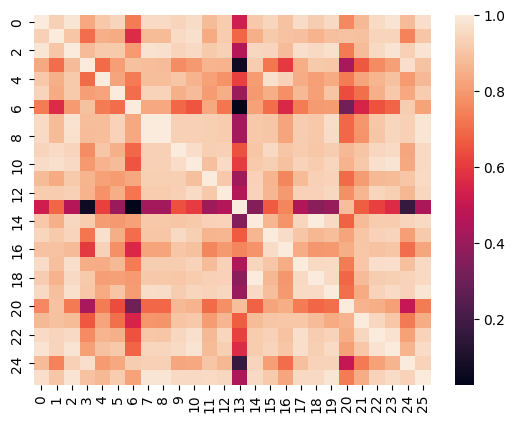

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

data_np = {'0': apple_adj_close,
        '1': abbv_adj_close,
        '2': msft_adj_close,
        '3': amzn_adj_close,
        '4': nvda_adj_close,
        '5': tsla_adj_close,
        '6': meta_adj_close,
        '7': goog_adj_close,
        '8': googl_adj_close,
        '9': brk_b_adj_close,
        '10': unh_adj_close,
        '11': jpm_adj_close,
        '12': jnj_adj_close,
        '13': xom_adj_close,
        '14': v_adj_close,
        '15': avgo_adj_close,
        '16': lly_adj_close,
        '17': pg_adj_close,
        '18': ma_adj_close,
        '19': hd_adj_close,
        '20': cvx_adj_close,
        '21': mrk_adj_close,
        '22': pep_adj_close,
        '23': cost_adj_close,
        '24': adbe_adj_close,
        '25': snp_adj_close
        }

data_pd = pd.DataFrame(data_np)
corr_matrix = data_pd.corr()

sn.heatmap(corr_matrix)
plt.show()

In [ ]:
data_np = np.array(data_pd)
print(np.shape(data_np))
adj_mat = np.array(corr_matrix)
print(np.shape(adj_mat))

(2264, 26)
(26, 26)


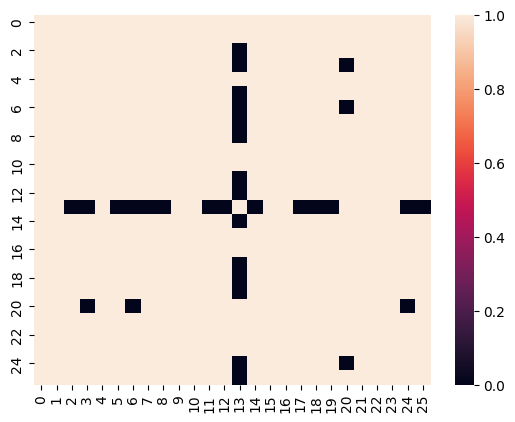

In [ ]:
for i in range(26):
  for j in range(26):
    if adj_mat[i,j] < 0.5:
      adj_mat[i,j] = 0
    else:
      adj_mat[i,j] = 1
data_heatmap = pd.DataFrame(adj_mat)
sn.heatmap(data_heatmap)
plt.show()

In [ ]:
from torch_geometric.utils import dense_to_sparse

adj_mat = torch.from_numpy(adj_mat)
edge_indices, values = dense_to_sparse(adj_mat)
edge_indices = edge_indices.numpy()
values = values.numpy()
edges = edge_indices
edge_weights = values

In [ ]:
print(np.shape(edges))
print(np.shape(edge_weights))

(2, 642)
(642,)


In [ ]:
time = np.zeros(shape=(len(data_np),len(data_np[0])))
for i in range(len(time)):
  time[i] = i/len(time)
print(np.shape(time))
print(time)

(2264, 26)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.41696113e-04 4.41696113e-04 4.41696113e-04 ... 4.41696113e-04
  4.41696113e-04 4.41696113e-04]
 [8.83392226e-04 8.83392226e-04 8.83392226e-04 ... 8.83392226e-04
  8.83392226e-04 8.83392226e-04]
 ...
 [9.98674912e-01 9.98674912e-01 9.98674912e-01 ... 9.98674912e-01
  9.98674912e-01 9.98674912e-01]
 [9.99116608e-01 9.99116608e-01 9.99116608e-01 ... 9.99116608e-01
  9.99116608e-01 9.99116608e-01]
 [9.99558304e-01 9.99558304e-01 9.99558304e-01 ... 9.99558304e-01
  9.99558304e-01 9.99558304e-01]]


In [ ]:
node_values = np.dstack((np.log(data_np),time)).transpose(1, 2, 0).astype(np.float32)
print(np.shape(node_values))

(26, 2, 2264)


In [ ]:
#means = np.mean(node_values, axis=(0, 2))
#node_values = node_values - means.reshape(1, -1, 1)
#stds = np.std(node_values, axis=(0, 2))
#node_values = node_values / stds.reshape(1, -1, 1)

In [ ]:
node_values = torch.from_numpy(node_values)
print(np.shape(node_values))
num_timesteps_in = 10
num_timesteps_out = 10

torch.Size([26, 2, 2264])


In [ ]:
indices = [
            (i, i + (num_timesteps_in + num_timesteps_out))
            for i in range(node_values.shape[2] - (num_timesteps_in + num_timesteps_out) + 1)
        ]

        # Generate observations
features, target = [], []
for i, j in indices:
  features.append((node_values[:, :, i : i + num_timesteps_in]).numpy())
  target.append((node_values[:, 0, i + num_timesteps_in : j]).numpy())

print(np.shape(features))
print("----------")
print(np.shape(target))

(2245, 26, 2, 10)
----------
(2245, 26, 10)


In [ ]:
from torch_geometric_temporal.signal import StaticGraphTemporalSignal

dataset = StaticGraphTemporalSignal(edges, edge_weights, features, target)

In [ ]:
from torch_geometric_temporal.signal import temporal_signal_split
train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.9)

print(train_dataset)
print(test_dataset)

In [ ]:
from torch_geometric_temporal.nn.recurrent import A3TGCN

class TemporalGNN(torch.nn.Module):
    def __init__(self, node_features, periods):
        super(TemporalGNN, self).__init__()
        # Attention Temporal Graph Convolutional Cell
        self.tgnn = A3TGCN(in_channels=node_features,
                           out_channels=32,
                           periods=periods)
        # Equals single-shot prediction
        self.linear = torch.nn.Linear(32, periods)

    def forward(self, x, edge_index):
        """
        x = Node features for T time steps
        edge_index = Graph edge indices
        """
        h = self.tgnn(x, edge_index)
        h = F.relu(h)
        h = self.linear(h)
        return h

TemporalGNN(node_features=2, periods=1)

TemporalGNN(
  (tgnn): A3TGCN(
    (_base_tgcn): TGCN(
      (conv_z): GCNConv(2, 32)
      (linear_z): Linear(in_features=64, out_features=32, bias=True)
      (conv_r): GCNConv(2, 32)
      (linear_r): Linear(in_features=64, out_features=32, bias=True)
      (conv_h): GCNConv(2, 32)
      (linear_h): Linear(in_features=64, out_features=32, bias=True)
    )
  )
  (linear): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
# GPU support
device = torch.device('cpu') # cuda
subset = 2000

# Create model and optimizers
model = TemporalGNN(node_features=2, periods=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model.train()

print("Running training...")
for epoch in range(20):
    loss = 0
    step = 0
    for snapshot in train_dataset:
        snapshot = snapshot.to(device)
        # Get model predictions
        y_hat = model(snapshot.x, snapshot.edge_index)
        # Mean squared error
        loss = loss + torch.mean((y_hat-snapshot.y)**2)
        step += 1
        if step > subset:
          break

    loss = loss / (step + 1)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print("Epoch {} train MSE: {:.4f}".format(epoch, loss.item()))

Running training...
Epoch 0 train MSE: 23.4424
Epoch 1 train MSE: 22.5020
Epoch 2 train MSE: 21.6798
Epoch 3 train MSE: 20.8286
Epoch 4 train MSE: 19.9265
Epoch 5 train MSE: 19.0046
Epoch 6 train MSE: 18.0312
Epoch 7 train MSE: 17.0591
Epoch 8 train MSE: 16.0874
Epoch 9 train MSE: 15.1452
Epoch 10 train MSE: 14.2525
Epoch 11 train MSE: 13.4151
Epoch 12 train MSE: 12.6304
Epoch 13 train MSE: 11.8931
Epoch 14 train MSE: 11.1967
Epoch 15 train MSE: 10.5355
Epoch 16 train MSE: 9.9052
Epoch 17 train MSE: 9.3029
Epoch 18 train MSE: 8.7271
Epoch 19 train MSE: 8.1768


In [ ]:
model.eval()
loss = 0
step = 0
horizon = 288

# Store for analysis
predictions = []
labels = []

for snapshot in test_dataset:
    snapshot = snapshot.to(device)
    # Get predictions
    y_hat = model(snapshot.x, snapshot.edge_index)
    # Mean squared error
    loss = loss + torch.mean((y_hat-snapshot.y)**2)
    # Store for analysis below
    labels.append(snapshot.y)
    predictions.append(y_hat)
    step += 1
    if step > horizon:
          break

loss = loss / (step+1)
loss = loss.item()
print("Test MSE: {:.4f}".format(loss))

Test MSE: 11.7666


In [ ]:
import numpy as np

sensor = 25
timestep = 0
preds = np.asarray([pred[sensor][timestep].detach().cpu().numpy() for pred in predictions])
labs  = np.asarray([label[sensor][timestep].cpu().numpy() for label in labels])
print("Data points:,", preds.shape)

Data points:, (225,)


<Axes: >

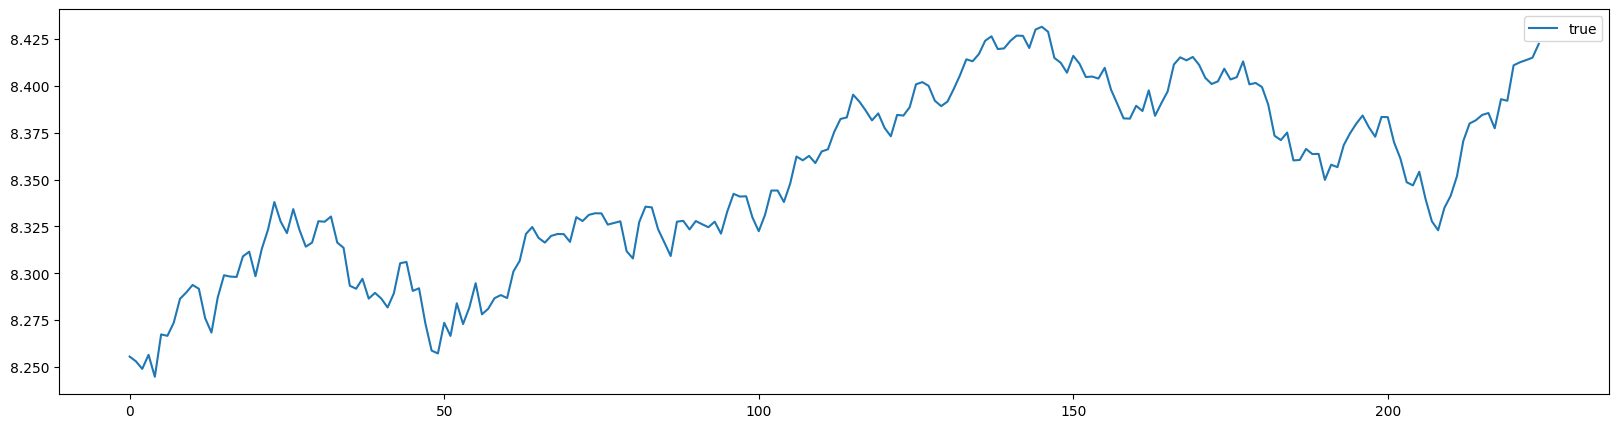

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
#sns.lineplot(data=preds, label="pred")
sns.lineplot(data=labs, label="true")

<Axes: >

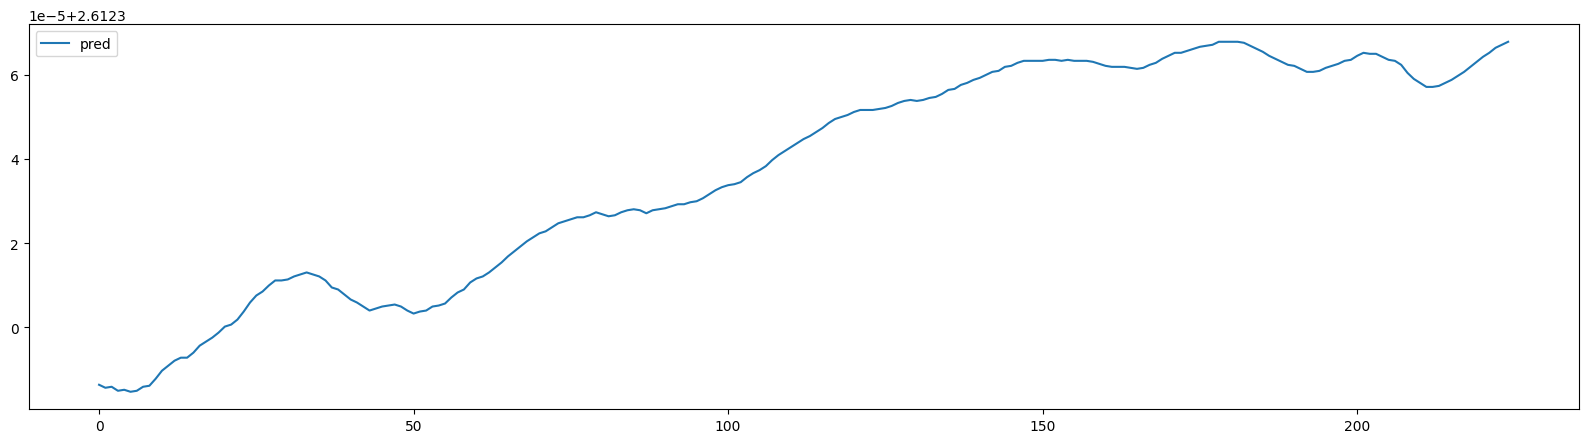

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=preds, label="pred")

In [ ]:
print(preds)

[2.6122863 2.6122856 2.6122859 2.612285  2.6122851 2.6122847 2.612285
 2.6122859 2.612286  2.6122878 2.6122897 2.6122909 2.612292  2.6122928
 2.6122928 2.612294  2.6122956 2.6122966 2.6122975 2.6122987 2.6123002
 2.6123006 2.6123018 2.6123037 2.6123059 2.6123075 2.6123085 2.61231
 2.6123111 2.6123111 2.6123114 2.612312  2.6123126 2.612313  2.6123126
 2.612312  2.6123111 2.6123095 2.612309  2.6123078 2.6123066 2.6123059
 2.612305  2.612304  2.6123044 2.612305  2.6123052 2.6123054 2.612305
 2.612304  2.6123033 2.6123037 2.612304  2.612305  2.6123052 2.6123056
 2.612307  2.6123083 2.612309  2.6123106 2.6123116 2.612312  2.612313
 2.6123142 2.6123154 2.6123168 2.612318  2.6123192 2.6123204 2.6123214
 2.6123223 2.6123228 2.6123238 2.6123247 2.6123252 2.6123257 2.6123261
 2.6123261 2.6123266 2.6123273 2.6123269 2.6123264 2.6123266 2.6123273
 2.6123278 2.612328  2.6123278 2.612327  2.6123278 2.612328  2.6123283
 2.6123288 2.6123292 2.6123292 2.6123297 2.61233   2.6123307 2.6123316
 2.6123326 

In [1]:
print("---------------------------------------------------------------")
print("Take 2 below")

---------------------------------------------------------------
Take 2 below


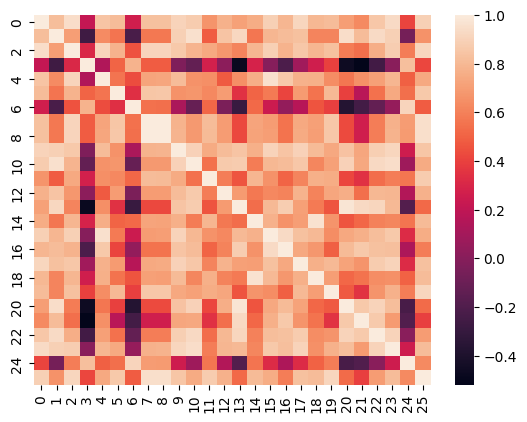

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

#Find the correlation matrix
data_np = {'0': apple_adj_close,
        '1': abbv_adj_close,
        '2': msft_adj_close,
        '3': amzn_adj_close,
        '4': nvda_adj_close,
        '5': tsla_adj_close,
        '6': meta_adj_close,
        '7': goog_adj_close,
        '8': googl_adj_close,
        '9': brk_b_adj_close,
        '10': unh_adj_close,
        '11': jpm_adj_close,
        '12': jnj_adj_close,
        '13': xom_adj_close,
        '14': v_adj_close,
        '15': avgo_adj_close,
        '16': lly_adj_close,
        '17': pg_adj_close,
        '18': ma_adj_close,
        '19': hd_adj_close,
        '20': cvx_adj_close,
        '21': mrk_adj_close,
        '22': pep_adj_close,
        '23': cost_adj_close,
        '24': adbe_adj_close,
        '25': snp_adj_close
        }

data_pd = pd.DataFrame(data_np)
corr_matrix = data_pd.corr()

sn.heatmap(corr_matrix)
plt.show()

In [ ]:
data_np = np.array(data_pd)
print(np.shape(data_np))
adj_mat = np.array(corr_matrix)
print(np.shape(adj_mat))

(1006, 26)
(26, 26)


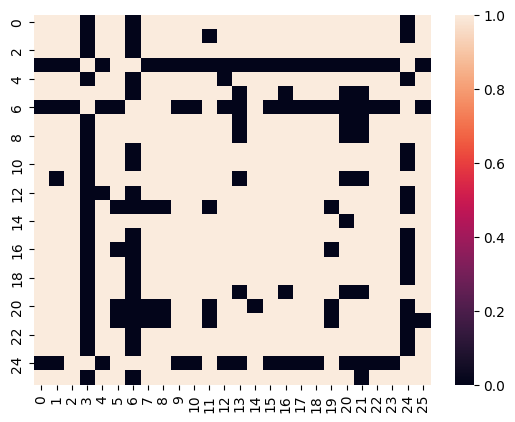

In [ ]:
#Create the unweighted adjacency matrix with the boundary conditioning being 0.5
for i in range(26):
  for j in range(26):
    if adj_mat[i,j] < 0.5:
      adj_mat[i,j] = 0
    else:
      adj_mat[i,j] = 1
data_heatmap = pd.DataFrame(adj_mat)
sn.heatmap(data_heatmap)
plt.show()

In [ ]:
import torch.nn.functional
def data_to_tensor(df, n_inputs, stonk_of_interest, window_size, n_days_ahead):
    n = df.shape[0]
    #n_windows = int(n / window_size) - 1 #
    n_windows = n - window_size - 1
    X = np.zeros(shape = (n_windows, window_size, n_inputs))
    Y = np.zeros(shape = (n_windows, 1))
    # We iterate through each window of data, then iterate through each dataframe coloumn
    # (each dataframe column holds price data for one stock)
    for i in range(n_days_ahead, n_windows):
        for j, col in enumerate(df.columns):
            for day in range(window_size):
                # Our X data for this window will contain daily % changes
                # in stonk price for the past few days
                X[i, day, j] = (df[col].iloc[i + day] - df[col].iloc[i + day + 1]) / df[col].iloc[i + day +1]
            if (col == stonk_of_interest):
                # Our Y data for this window will contain
                # daily % change in stonk tomorrow
                Y[i, 0] = (df[col].iloc[i-n_days_ahead] - df[col].iloc[i]) / df[col].iloc[i]

    return(X, Y, n_windows)

In [ ]:
X,Y,n_windows = data_to_tensor(data_pd, 26, '25', 1, 1)

In [ ]:
#Reshape the ouptut
data_dts = X.transpose(0,2,1)
print(np.shape(data_dts))

(1004, 1)
(1004, 26, 1)
(26, 994, 1)


(994, 26, 1)

In [ ]:
from torch_geometric.utils import dense_to_sparse

#Get the edge indices and weights
adj_mat = torch.from_numpy(adj_mat)
edge_indices, values = dense_to_sparse(adj_mat)
edge_indices = edge_indices.numpy()
values = values.numpy()
edges = edge_indices
edge_weights = values

In [ ]:
print(np.shape(edges))
print(np.shape(edge_weights))

(2, 522)
(522,)


In [ ]:
#Create the time vector
time = np.zeros(shape=(len(data_dts),len(data_dts[0])))
for i in range(len(time)):
  time[i] = i/len(time)
print(np.shape(time))

(1004, 26)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.96015936e-04 9.96015936e-04 9.96015936e-04 ... 9.96015936e-04
  9.96015936e-04 9.96015936e-04]
 [1.99203187e-03 1.99203187e-03 1.99203187e-03 ... 1.99203187e-03
  1.99203187e-03 1.99203187e-03]
 ...
 [9.97011952e-01 9.97011952e-01 9.97011952e-01 ... 9.97011952e-01
  9.97011952e-01 9.97011952e-01]
 [9.98007968e-01 9.98007968e-01 9.98007968e-01 ... 9.98007968e-01
  9.98007968e-01 9.98007968e-01]
 [9.99003984e-01 9.99003984e-01 9.99003984e-01 ... 9.99003984e-01
  9.99003984e-01 9.99003984e-01]]


In [ ]:
#Pairs the time with the prices
node_values = np.dstack((data_dts,time)).transpose(1, 2, 0).astype(np.float32)
print(np.shape(node_values))

(26, 2, 1004)


In [ ]:
node_values = torch.from_numpy(node_values)
print(np.shape(node_values))
num_timesteps_in = 10
num_timesteps_out = 1

torch.Size([26, 2, 1004])


In [ ]:
indices = [
            (i, i + (num_timesteps_in + num_timesteps_out))
            for i in range(node_values.shape[2] - (num_timesteps_in + num_timesteps_out) + 1)
        ]

        # Generate observations
features, target = [], []
for i, j in indices:
  features.append((node_values[:, :, i : i + num_timesteps_in]).numpy())
  target.append((node_values[:, 0, i + num_timesteps_in : j]).numpy())

print(np.shape(features))
print("----------")
print(np.shape(target))

(994, 26, 2, 10)
----------
(994, 26, 1)


In [2]:
from torch_geometric_temporal.signal import StaticGraphTemporalSignal

#Create the dataset
dataset = StaticGraphTemporalSignal(edges, edge_weights, features, target)

ModuleNotFoundError: ignored

In [ ]:
from torch_geometric_temporal.signal import temporal_signal_split
#90% train/test split
train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.9)

print(train_dataset)
print(test_dataset)

In [ ]:
from torch_geometric_temporal.nn.recurrent import A3TGCN

class TemporalGNN(torch.nn.Module):
    def __init__(self, node_features, periods, edge_weights):
        super(TemporalGNN, self).__init__()
        # Attention Temporal Graph Convolutional Cell
        self.tgnn = A3TGCN(in_channels=node_features,
                           out_channels=32,
                           periods=periods,
                           cached = True)
        self.tgnn1 = A3TGCN(in_channels=node_features,
                           out_channels=32,
                           periods=periods,
                           cached = True)
        # Equals single-shot prediction
        self.linear = torch.nn.Linear(32, 64)
        self.linear2 = torch.nn.Linear(64, 97)
        self.linear3 = torch.nn.Linear(97, 146)

    def forward(self, x, edge_index, edge_weights):
        """
        x = Node features for T time steps
        edge_index = Graph edge indices
        edge_weights = Graph edge weights
        """
        h1 = F.celu(self.tgnn(x, edge_index, edge_weights))
        h2 = F.relu(self.tgnn1(x, edge_index, edge_weights))
        h = F.relu(torch.nn.Bilinear(32,32,32)(h1, h2))
        h = F.celu(self.linear(h))
        h = F.celu(self.linear2(h))
        h = F.celu(self.linear3(h))

        return h

TemporalGNN(node_features=2, periods=num_timesteps_out, edge_weights=edge_weights)

TemporalGNN(
  (tgnn): A3TGCN(
    (_base_tgcn): TGCN(
      (conv_z): GCNConv(2, 32)
      (linear_z): Linear(in_features=64, out_features=32, bias=True)
      (conv_r): GCNConv(2, 32)
      (linear_r): Linear(in_features=64, out_features=32, bias=True)
      (conv_h): GCNConv(2, 32)
      (linear_h): Linear(in_features=64, out_features=32, bias=True)
    )
  )
  (tgnn1): A3TGCN(
    (_base_tgcn): TGCN(
      (conv_z): GCNConv(2, 32)
      (linear_z): Linear(in_features=64, out_features=32, bias=True)
      (conv_r): GCNConv(2, 32)
      (linear_r): Linear(in_features=64, out_features=32, bias=True)
      (conv_h): GCNConv(2, 32)
      (linear_h): Linear(in_features=64, out_features=32, bias=True)
    )
  )
  (linear): Linear(in_features=32, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=97, bias=True)
  (linear3): Linear(in_features=97, out_features=146, bias=True)
)

In [ ]:
# GPU support
import tqdm
device = torch.device('cpu') # cuda
subset = 2500

# Create model and optimizers
model = TemporalGNN(node_features=2, periods=num_timesteps_out, edge_weights = edge_weights).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=3.9e-4)
loss_fn = torch.nn.MSELoss()
model.train()


print("Running training...")
for epoch in range(20):
    loss = 0
    step = 0
    for snapshot in train_dataset:

        snapshot = snapshot.to(device)
        # Get model predictions
        y_hat = model(snapshot.x, snapshot.edge_index, snapshot.edge_weight)
        # Mean squared error
        loss = loss_fn(snapshot.y, y_hat)
        step += 1
        if step > subset:
          break
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print("Epoch {} train MSE: {:.8f}".format(epoch, loss.item()))

Running training...


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([26, 146])) that is different to the input size (torch.Size([26, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 train MAE: 0.00663767
Epoch 1 train MAE: 0.00632892
Epoch 2 train MAE: 0.00570202
Epoch 3 train MAE: 0.00519209
Epoch 4 train MAE: 0.00441231
Epoch 5 train MAE: 0.00418348
Epoch 6 train MAE: 0.00399425
Epoch 7 train MAE: 0.00337877
Epoch 8 train MAE: 0.00317452
Epoch 9 train MAE: 0.00287519
Epoch 10 train MAE: 0.00263629
Epoch 11 train MAE: 0.00234122
Epoch 12 train MAE: 0.00217069
Epoch 13 train MAE: 0.00206302
Epoch 14 train MAE: 0.00200981
Epoch 15 train MAE: 0.00185735
Epoch 16 train MAE: 0.00159344
Epoch 17 train MAE: 0.00135378
Epoch 18 train MAE: 0.00122586
Epoch 19 train MAE: 0.00120368


In [ ]:
model.eval()
loss = 0
step = 0
horizon = 288

# Store for analysis
predictions = []
labels = []

for snapshot in test_dataset:
    snapshot = snapshot.to(device)
    # Get predictions
    y_hat = model(snapshot.x, snapshot.edge_index, snapshot.edge_weight)
    # Mean squared error
    loss = loss + torch.mean((y_hat-snapshot.y)**2)
    # Store for analysis below
    labels.append(snapshot.y)
    predictions.append(y_hat)
    step += 1
    if step > horizon:
          break

loss = loss.item()
print("Test MSE: {:.8f}".format(loss))

Test MSE: 0.11946344


In [ ]:
import numpy as np

sensor = 25
timestep = 0
preds = np.asarray([pred[sensor][timestep].detach().cpu().numpy() for pred in predictions])
labs  = np.asarray([label[sensor][timestep].cpu().numpy() for label in labels])
print("Data points:,", preds.shape)

Data points:, (100,)


<Axes: >

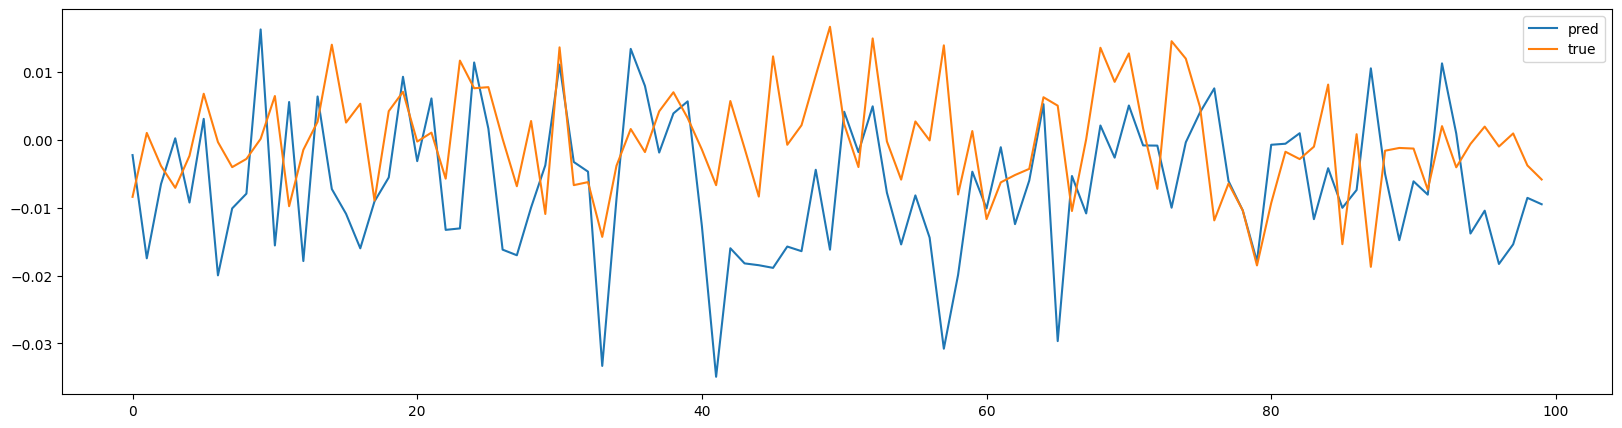

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.lineplot(data=preds, label="pred")
sns.lineplot(data=labs, label="true")

Data points:, (100,)


<Axes: >

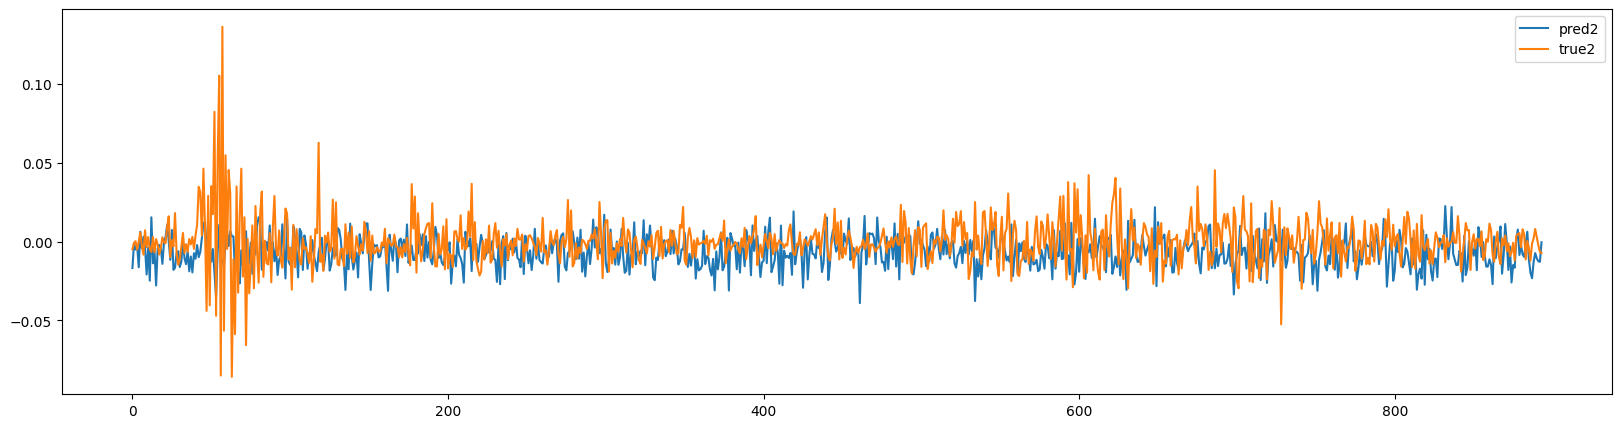

In [ ]:
predictions2 = []
labels2 = []

for snapshot in train_dataset:
    snapshot = snapshot.to(device)
    # Get predictions
    y_hat = model(snapshot.x, snapshot.edge_index, snapshot.edge_weight)
    # Mean squared error
    #loss = loss + torch.mean((y_hat-snapshot.y)**2)
    # Store for analysis below
    labels2.append(snapshot.y)
    predictions2.append(y_hat)

sensor = 25
timestep = 0

preds2 = np.asarray([pred[sensor][timestep].detach().cpu().numpy() for pred in predictions2])
labs2  = np.asarray([label[sensor][timestep].cpu().numpy() for label in labels2])
print("Data points:,", preds.shape)

plt.figure(figsize=(20,5))
sns.lineplot(data=preds2, label="pred2")
sns.lineplot(data=labs2, label="true2")

In [ ]:
print((preds))

[-0.0022434  -0.01745772 -0.00650644  0.00023365 -0.00923795  0.00309987
 -0.01997131 -0.0101009  -0.0079273   0.01628248 -0.01556438  0.00558233
 -0.01786321  0.00639886 -0.0072459  -0.01090032 -0.0159874  -0.00906783
 -0.00553834  0.00930064 -0.0031364   0.00610867 -0.01326805 -0.01305038
  0.01141123  0.00165758 -0.0161829  -0.01700872 -0.00997156 -0.00374198
  0.01109542 -0.00325996 -0.00468302 -0.03332436 -0.00871474  0.01341764
  0.00795332 -0.00186867  0.00390105  0.0056785  -0.01269162 -0.03492475
 -0.01597768 -0.01820952 -0.01847714 -0.01886827 -0.01572496 -0.01640785
 -0.00440431 -0.01618296  0.00414874 -0.00180721  0.00494912 -0.00778449
 -0.01541311 -0.00818408 -0.01440662 -0.03078359 -0.01990443 -0.00469017
 -0.01010418 -0.0010789  -0.01242107 -0.00600135  0.0052649  -0.02966517
 -0.0053243  -0.01084274  0.00212023 -0.00261837  0.00506833 -0.00081801
 -0.00084579 -0.01000053 -0.00035506  0.00406243  0.00759274 -0.00606942
 -0.01039857 -0.01791328 -0.00072128 -0.00056678  0